Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Importing Dataset

In [3]:
data = pd.read_csv('/content/Palani Temple Visitors Dataset.csv', encoding='latin1')
display(data)

,Date,Day,Month,Visitors,Weather,Temperature (°C),Holiday,Special_Features,Event,Week_of_Year
0,01-01-2024,Monday,1,825,Cloudy,39,Yes,National Holiday,Cultural Event,0
1,02-01-2024,Tuesday,1,8962,Cloudy,30,No,NaN,Regular Day,0
2,03-01-2024,Wednesday,1,10000,Clear,32,No,NaN,Regular Day,0
3,04-01-2024,Thursday,1,18632,Sunny,24,No,NaN,Festival,0
4,05-01-2024,Friday,1,5155,Rainy,39,No,NaN,Cultural Event,0
...,...,...,...,...,...,...,...,...,...,...
725,26-12-2025,Friday,12,10000,Clear,32,No,NaN,Regular Day,51
726,27-12-2025,Saturday,12,34003,Clear,24,No,NaN,National Holiday,51
727,28-12-2025,Sunday,12,12730,Sunny,37,No,NaN,Regular Day,52
728,29-12-2025,Monday,12,18950,Rainy,31,No,NaN,Festival,52


Data Understanding


In [4]:
print("The Shape of the dataset:",data.shape)
print("No.of Rows in the dataset:",data.shape[0])
print("No.of Columns in the dataset:",data.shape[1])

The Shape of the dataset: (730, 10)
No.of Rows in the dataset: 730
No.of Columns in the dataset: 10


In [5]:
print("First Five Rows:")
data.head()

First Five Rows:


,Date,Day,Month,Visitors,Weather,Temperature (°C),Holiday,Special_Features,Event,Week_of_Year
0,01-01-2024,Monday,1,825,Cloudy,39,Yes,National Holiday,Cultural Event,0
1,02-01-2024,Tuesday,1,8962,Cloudy,30,No,NaN,Regular Day,0
2,03-01-2024,Wednesday,1,10000,Clear,32,No,NaN,Regular Day,0
3,04-01-2024,Thursday,1,18632,Sunny,24,No,NaN,Festival,0
4,05-01-2024,Friday,1,5155,Rainy,39,No,NaN,Cultural Event,0


In [6]:
print("Quick Summary:")
data.info()

Quick Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              730 non-null    object
 1   Day               730 non-null    object
 2   Month             730 non-null    int64 
 3   Visitors          730 non-null    int64 
 4   Weather           730 non-null    object
 5   Temperature (°C)  730 non-null    int64 
 6   Holiday           730 non-null    object
 7   Special_Features  47 non-null     object
 8   Event             730 non-null    object
 9   Week_of_Year      730 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 57.2+ KB


In [7]:
print("Duplicated Values:")
data.duplicated().value_counts()

Duplicated Values:


,count
False,730


In [8]:
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,Month,Visitors,Temperature (°C),Week_of_Year
count,730.000000,730.000000,730.000000,730.000000
mean,6.512329,18216.908219,29.401370,25.857534
std,3.448303,11219.942732,5.670345,15.067347
min,1.000000,500.000000,20.000000,0.000000
25%,4.000000,9918.250000,24.250000,13.000000
50%,7.000000,17198.000000,29.000000,26.000000
75%,9.750000,25847.750000,34.000000,39.000000
max,12.000000,50000.000000,39.000000,52.000000


In [9]:
print("Missing or Null Values:")
data.isnull().sum()

Missing or Null Values:


,0
Date,0
Day,0
Month,0
Visitors,0
Weather,0
Temperature (°C),0
Holiday,0
Special_Features,683
Event,0
Week_of_Year,0


Data Visualization

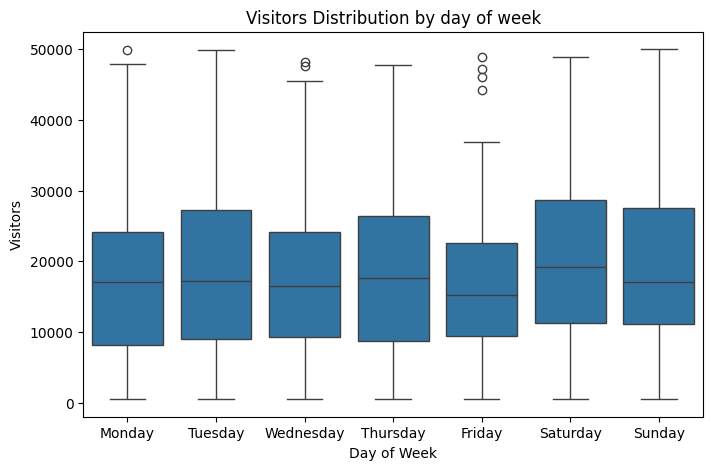

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day', y='Visitors', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Visitors')
plt.title('Visitors Distribution by day of week')
plt.show()

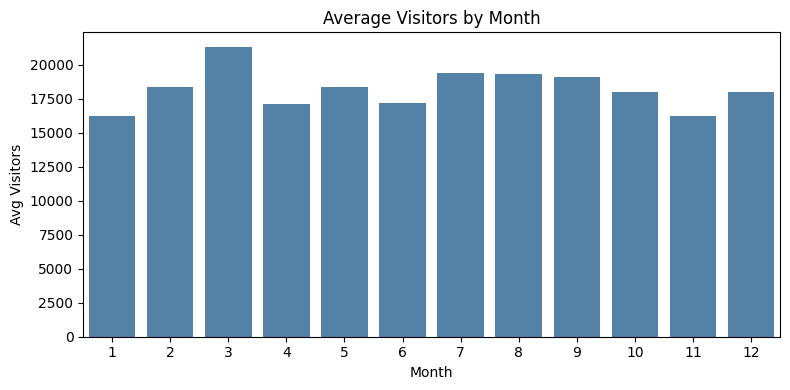

In [11]:
plt.figure(figsize=(8,4))
month_avg = data.groupby('Month', as_index=False)['Visitors'].mean().sort_values('Month')
sns.barplot(data=month_avg, x='Month', y='Visitors', color='steelblue')
plt.title('Average Visitors by Month')
plt.xlabel('Month')
plt.ylabel('Avg Visitors')
plt.tight_layout()
plt.show()

Data Preparation

In [13]:
from sklearn.preprocessing import LabelEncoder

le_day = LabelEncoder()
le_weather = LabelEncoder()
le_event = LabelEncoder() # Renamed from le_festival
le_month = LabelEncoder()

data['Day'] = le_day.fit_transform(data['Day'])
data['Weather'] = le_weather.fit_transform(data['Weather'])
data['Event'] = le_event.fit_transform(data['Event']) # Corrected from 'Festival' to 'Event'
data['Month'] = le_month.fit_transform(data['Month'])

data.head()

,Date,Day,Month,Visitors,Weather,Temperature (°C),Holiday,Special_Features,Event,Week_of_Year
0,01-01-2024,1,0,825,1,39,Yes,National Holiday,0,0
1,02-01-2024,5,0,8962,1,30,No,NaN,3,0
2,03-01-2024,6,0,10000,0,32,No,NaN,3,0
3,04-01-2024,4,0,18632,3,24,No,NaN,1,0
4,05-01-2024,0,0,5155,2,39,No,NaN,0,0


In [14]:
data.head()

,Date,Day,Month,Visitors,Weather,Temperature (°C),Holiday,Special_Features,Event,Week_of_Year
0,01-01-2024,1,0,825,1,39,Yes,National Holiday,0,0
1,02-01-2024,5,0,8962,1,30,No,NaN,3,0
2,03-01-2024,6,0,10000,0,32,No,NaN,3,0
3,04-01-2024,4,0,18632,3,24,No,NaN,1,0
4,05-01-2024,0,0,5155,2,39,No,NaN,0,0


Model Building

In [18]:
X = data[['Day', 'Weather', 'Event', 'Month']] #input features
Y = data['Visitors'] #output label

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model Training

In [20]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Model Testing

In [21]:
Y_pred = model.predict(X_test)

Model Evaluation

In [22]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Model Performance:")
print("Mean Squared Error:", mse)
print("R2 squared:", r2)

Model Performance:
Mean Squared Error: 125526952.46051475
R2 squared: -0.007495940225427544


Visualization of the Actual vs Predicted

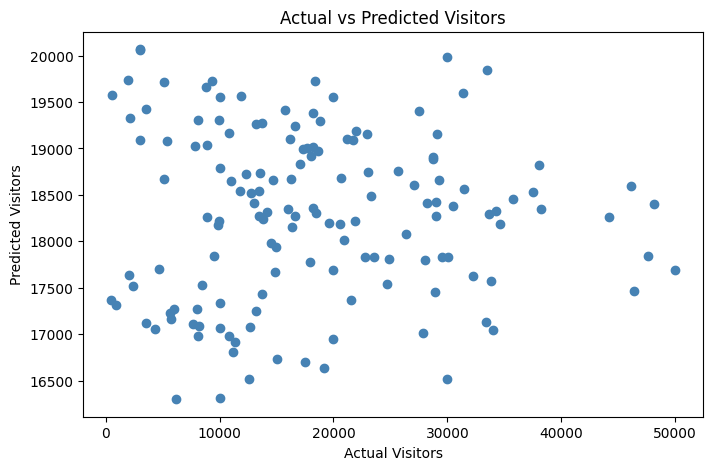

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_test, Y_pred, color='steelblue')
plt.xlabel('Actual Visitors')
plt.ylabel('Predicted Visitors')
plt.title('Actual vs Predicted Visitors')
plt.show()

Example Prediction

In [28]:
sample_input = np.array([[4,2,1,9]]) # Example: [Day,Weather,Event,Month]
sample_prediction = model.predict(sample_input)
print("Predicted Visitors:", int(sample_prediction[0]))

Predicted Visitors: 18422


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Benifit Of Prediction

Predicting helps us ensuring safer and more efficient experience for all the visitors